In [1]:
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from keras.layers import Dense, Dropout

from matplotlib import pyplot



Using TensorFlow backend.


In [8]:
fdctory='D:\\Shaopeng on machine learning\\Kaggle_Shubo\Data\\fMRI_competition'
os.chdir(fdctory)

with open('features_512.pk', 'rb') as f:
    x = pickle.load(f)

with open('y_train.pk', 'rb') as f:
    y = pickle.load(f)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

val_x, val_x, evl_y, evl_y = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(train_x)
y = sc_y.fit_transform(train_y)
X_test = sc_X.fit_transform(test_x)
y_test = sc_y.fit_transform(test_y)

loading=pd.read_csv('loading.csv')
fnc=pd.read_csv('fnc.csv')
ICN_num=pd.read_csv('ICN_numbers.csv')
ID_site2=pd.read_csv('reveal_ID_site2.csv')
train_scores=pd.read_csv('train_scores.csv')

In [71]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,4.103895,5.684214,2.098208,5.188046,4.038535,3.485445,3.382099,3.261429,3.348547,1.923593,...,2.229850,3.539399,1.684418,3.971759,4.787309,1.433919,1.732534,6.348838,0.855678,2.343616
1,3.733469,4.477904,1.851237,5.475603,4.797605,4.235373,4.382057,4.662331,3.165593,2.061907,...,2.485954,3.900663,1.485026,3.884533,4.642402,2.587695,2.000875,5.264329,1.099525,2.930105
2,3.778871,4.935719,1.670830,5.801820,5.353310,4.705373,5.274077,5.290926,3.188184,2.509456,...,3.402400,4.003388,0.968776,4.556301,5.557565,3.193635,2.397074,5.281394,2.376009,3.388042
3,3.682853,5.343725,2.131504,5.638901,4.978138,4.145651,3.864457,4.206456,2.884188,2.390324,...,2.289896,3.722303,1.535737,3.410061,4.768682,2.328695,1.978705,6.043396,1.499768,2.847468
4,3.440170,5.086637,1.915383,5.220218,4.551360,4.330769,3.996255,4.222156,3.418201,1.958005,...,2.871852,4.008320,1.293915,3.958404,5.529665,2.215153,2.285054,5.542633,1.186254,3.023549
5,3.978149,5.603290,1.951553,5.139734,4.078315,3.485616,3.451175,3.340316,2.903246,1.912163,...,2.394820,3.091940,1.585095,3.298775,4.802088,1.925336,1.804873,6.369855,1.320468,2.638824
6,3.547783,4.913588,1.928310,5.609710,4.770347,4.164264,4.155305,4.113458,3.166256,2.318072,...,3.034451,3.605076,1.502172,3.407108,5.108732,2.925512,2.056233,5.868168,1.650939,3.071865
7,4.064549,4.891006,1.965180,6.026823,5.098547,4.324720,4.193056,4.166489,3.031256,2.302112,...,2.633624,3.482326,1.197046,3.639356,5.171186,2.662071,2.536735,5.186156,1.512655,3.305686
8,3.902479,5.437113,2.488022,5.220106,4.582361,4.195177,4.284275,4.155191,3.206512,2.247403,...,2.658098,3.486886,1.429804,3.545951,4.633708,2.660239,2.019169,6.177548,1.414657,3.030929
9,3.822071,5.472135,2.115395,5.148754,4.473443,4.237429,3.850919,4.349938,3.234344,2.613309,...,2.477211,3.750822,1.465583,3.644792,5.006032,2.435807,2.328243,5.883891,1.343708,2.882357


In [9]:
fnc.head()

,Id,SCN(53)_vs_SCN(69),SCN(98)_vs_SCN(69),SCN(99)_vs_SCN(69),SCN(45)_vs_SCN(69),ADN(21)_vs_SCN(69),ADN(56)_vs_SCN(69),SMN(3)_vs_SCN(69),SMN(9)_vs_SCN(69),SMN(2)_vs_SCN(69),...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.368580,0.166876,0.438148,0.341007,-0.186251,0.049096,0.121417,-0.174268,-0.231578,...,-0.149279,0.552841,0.131046,0.335446,0.394867,-0.042853,0.124627,-0.060712,0.515964,0.290488
1,10002,0.151696,-0.024819,0.217504,0.418072,-0.227234,-0.064052,-0.143832,-0.118116,-0.054825,...,-0.214216,-0.039792,0.143014,-0.189962,0.498373,0.444231,0.592438,0.028649,0.705524,0.248327
2,10003,0.343415,0.109974,0.741641,0.578558,-0.676446,-0.436960,-0.295663,-0.377790,-0.344963,...,-0.154941,0.136850,-0.022361,0.137625,0.677972,0.409412,0.563892,0.438684,0.618204,0.284474
3,10004,0.132793,0.258255,0.490769,0.342717,0.091112,0.107969,0.029220,-0.026237,0.094742,...,-0.130339,0.309540,0.141469,0.030853,0.344394,0.214097,0.317556,0.012435,0.665937,0.081358
4,10005,0.291921,0.251254,0.416470,0.511719,-0.362626,-0.164710,-0.289059,-0.015537,-0.087316,...,-0.139525,0.394932,0.040443,0.428334,0.498837,0.266755,0.227379,0.028984,0.752343,0.087898


In [16]:
loading

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,0.003484,0.001797,...,0.018246,0.023711,0.009177,-0.013929,0.030696,0.010496,0.002892,-0.023235,0.022177,0.017192
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,0.002946,0.004086,...,0.014635,0.022556,0.012004,-0.011814,0.022479,0.005739,0.002880,-0.016609,0.025543,0.014524
2,10003,0.008151,0.014684,0.010444,-0.005293,-0.002913,0.015042,0.017745,0.003930,-0.008021,...,0.019565,0.030616,0.018184,-0.010469,0.029799,0.015435,0.005211,-0.028882,0.031427,0.018164
3,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,0.000193,0.008075,...,0.002658,0.022266,0.005956,-0.010595,0.024078,-0.000319,0.005866,-0.015182,0.024476,0.014760
4,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,0.003637,0.004180,...,0.009702,0.017257,0.005454,-0.008591,0.019416,0.000786,0.002692,-0.019814,0.017105,0.013316
5,10006,0.000334,0.005311,0.010053,0.006920,-0.000065,0.015310,0.016543,0.004794,0.003982,...,0.006948,0.019818,0.003582,-0.010414,0.023518,0.005929,0.005046,-0.030771,0.028500,0.022485
6,10007,0.005192,0.010585,0.012160,-0.000920,-0.002255,0.011416,0.013838,0.001929,0.003051,...,0.006218,0.017332,0.016791,-0.009594,0.019757,0.003731,0.000733,-0.008462,0.026733,0.014358
7,10008,0.007745,0.009748,0.009356,-0.004219,-0.003852,0.012024,0.010205,0.002903,0.000870,...,0.012880,0.016781,0.014109,-0.006456,0.025408,0.004483,0.000688,-0.013822,0.029328,0.010936
8,10009,0.008495,0.007572,0.010921,0.004551,0.002167,0.013580,0.016177,-0.000311,0.002852,...,0.003831,0.018917,0.011296,-0.011994,0.019234,0.002735,0.000191,-0.022801,0.029657,0.011801
9,10010,0.007103,0.006144,0.009770,-0.002884,-0.001346,0.015651,0.011613,-0.003291,0.013423,...,0.001252,0.020002,0.013935,-0.005653,0.013281,0.003379,0.004841,-0.009467,0.027287,0.014542


In [15]:
ICN_num

,ICN_number
0,69
1,53
2,98
3,99
4,45
5,21
6,56
7,3
8,9
9,2


In [17]:
ID_site2

,Id
0,10012
1,10014
2,10020
3,10034
4,10059
5,10093
6,10095
7,10102
8,10119
9,10173


In [18]:
train_scores

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,10001,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005,66.532630,NaN,NaN,52.108977,69.993075
4,10007,38.617381,49.197021,65.674285,40.151376,34.096421
5,10008,35.326582,15.769168,65.782269,44.643805,50.448485
6,10009,51.996514,57.093399,36.681207,45.422433,38.105260
7,10015,64.203107,52.790801,38.850229,28.496668,38.194583
8,10017,36.961174,47.021754,44.546044,41.228835,62.584261
9,10019,33.404691,51.679241,57.632238,50.118422,38.304555


In [28]:
from sklearn.impute import SimpleImputer
from numpy import nan
imp = SimpleImputer(missing_values=nan, strategy='mean')

In [42]:
columns=['Age','Domain1_val1','Domain1_va2','Domain2_val1','Domain2_val2']
columns

['Age', 'Domain1_val1', 'Domain1_va2', 'Domain2_val1', 'Domain2_val2']

In [75]:
transformed_values = imp.fit_transform(train_scores)
transformed_values1=pd.DataFrame(transformed_values, columns=['Id','Age','Domain1_val1','Domain1_va2','Domain2_val1','Domain2_val2'])
transformed_values1.head()



,Id,Age,Domain1_val1,Domain1_va2,Domain2_val1,Domain2_val2
0,10001.0,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002.0,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004.0,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005.0,66.532630,51.474692,59.244132,52.108977,69.993075
4,10007.0,38.617381,49.197021,65.674285,40.151376,34.096421


In [76]:
df3 = pd.merge(loading, transformed_values1, on='Id')
df3

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_20,IC_30,IC_22,IC_29,IC_14,Age,Domain1_val1,Domain1_va2,Domain2_val1,Domain2_val2
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,3.483700e-03,0.001797,...,0.010496,0.002892,-0.023235,0.022177,0.017192,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,2.945600e-03,0.004086,...,0.005739,0.002880,-0.016609,0.025543,0.014524,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,1.929200e-04,0.008075,...,-0.000319,0.005866,-0.015182,0.024476,0.014760,71.413018,53.152498,58.012103,52.418389,62.536641
3,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,3.637300e-03,0.004180,...,0.000786,0.002692,-0.019814,0.017105,0.013316,66.532630,51.474692,59.244132,52.108977,69.993075
4,10007,0.005192,0.010585,0.012160,-0.000920,-0.002255,0.011416,0.013838,1.929000e-03,0.003051,...,0.003731,0.000733,-0.008462,0.026733,0.014358,38.617381,49.197021,65.674285,40.151376,34.096421
5,10008,0.007745,0.009748,0.009356,-0.004219,-0.003852,0.012024,0.010205,2.902700e-03,0.000870,...,0.004483,0.000688,-0.013822,0.029328,0.010936,35.326582,15.769168,65.782269,44.643805,50.448485
6,10009,0.008495,0.007572,0.010921,0.004551,0.002167,0.013580,0.016177,-3.109900e-04,0.002852,...,0.002735,0.000191,-0.022801,0.029657,0.011801,51.996514,57.093399,36.681207,45.422433,38.105260
7,10015,0.005622,0.008318,0.010585,0.003334,0.002399,0.011200,0.010986,6.115300e-03,0.002293,...,0.008277,0.002384,-0.017118,0.018147,0.014361,64.203107,52.790801,38.850229,28.496668,38.194583
8,10017,0.006316,0.001719,0.010152,0.002492,-0.001643,0.013190,0.017908,6.049500e-04,0.010978,...,0.000922,0.007126,-0.011537,0.019824,0.018894,36.961174,47.021754,44.546044,41.228835,62.584261
9,10019,0.000237,0.012026,0.014051,-0.001642,0.000304,0.015834,0.008750,-6.297300e-04,0.009139,...,0.001903,0.006740,-0.005448,0.027667,0.008549,33.404691,51.679241,57.632238,50.118422,38.304555


In [111]:
y_train_score=df3.iloc[:,-5:]
y_train_score
x_train_score=df3.iloc[:,1:27]
x_train_score
x_train_score=x_train_score.to_numpy()
y_train_score=y_train_score.to_numpy()

In [112]:
train_score_x, test_score_x, train_score_y, test_score_y = train_test_split(
    x_train_score, y_train_score, test_size = 0.3, random_state = 42
)

In [113]:
test_score_y.shape


(1764, 5)

In [116]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor(n_neighbors=305)))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	level0.append(('Ridge', Ridge()))
	level0.append(('Lasso', Lasso()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor(n_neighbors=305)
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['Ridge'] = Ridge()
	models['Lasso'] = Lasso()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model,train_score_x,y_ID,test_score_x, y_test_ID):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    NewModel = model.fit(train_score_x, y_ID)
    score_kaggle_train = NewModel.predict(train_score_x)
    score_kaggle_train_score=sum((score_kaggle_train-y_ID)/y_ID)
    score_kaggle_test = NewModel.predict(test_score_x)
    score_kaggle_test_score=sum((score_kaggle_test-y_test_ID)/y_test_ID)
    return score_kaggle_train_score, score_kaggle_test_score


>knn Col ID is 0 292.612 (147.587)
>knn Col ID is 1 183.729 (84.601)
>knn Col ID is 2 173.834 (132.532)
>knn Col ID is 3 433.227 (230.161)
>knn Col ID is 4 340.360 (127.899)
>cart Col ID is 0 0.000 (106.678)
>cart Col ID is 1 0.000 (78.863)
>cart Col ID is 2 0.000 (111.684)
>cart Col ID is 3 0.000 (238.786)
>cart Col ID is 4 0.000 (128.897)
>svm Col ID is 0 257.726 (128.503)
>svm Col ID is 1 171.111 (78.371)
>svm Col ID is 2 197.993 (144.202)
>svm Col ID is 3 480.171 (252.185)
>svm Col ID is 4 415.694 (161.280)
>Ridge Col ID is 0 361.524 (181.929)
>Ridge Col ID is 1 173.210 (81.557)
>Ridge Col ID is 2 178.689 (135.695)
>Ridge Col ID is 3 422.458 (224.814)
>Ridge Col ID is 4 355.943 (134.243)
>Lasso Col ID is 0 392.381 (197.559)
>Lasso Col ID is 1 175.744 (83.248)
>Lasso Col ID is 2 178.811 (135.677)
>Lasso Col ID is 3 424.191 (225.572)
>Lasso Col ID is 4 356.604 (134.277)
>stacking Col ID is 0 236.926 (119.736)
>stacking Col ID is 1 160.616 (71.947)
>stacking Col ID is 2 175.620 (135.1

ValueError: Dimensions of labels and X must be compatible

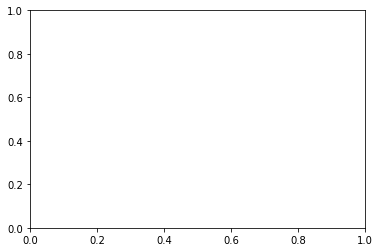

In [120]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, results_eval, names = list(), list(), list()
#new_y_score_train = pd.DataFrame()
#new_y_score_test = pd.DataFrame()
for name, model in models.items():
    for ID in [0,1,2,3,4]:
        y_ID=train_score_y[:,ID]
        y_test_ID=test_score_y[:,ID]
        score_kaggle_train_score, score_kaggle_test_score = evaluate_model(model,train_score_x,y_ID,test_score_x, y_test_ID)
        results.append(score_kaggle_train_score)
        #new_y_score_train.append(score_kaggle_train_score)
        results_eval.append(score_kaggle_test_score)
        #new_y_score_test.append(score_kaggle_test_score)
        names.append(name)
        print('>%s Col ID is %s %.3f (%.3f)' % (name, ID,score_kaggle_train_score, score_kaggle_test_score))



In [128]:
results=pd.DataFrame(results)
results_eval=pd.DataFrame(results_eval)

In [165]:
K=results.loc[0:4,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('KNN Train score is %s' % (K))
K=results.loc[5:9,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Tree Train score is %s' % (K))
K=results.loc[10:14,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('SVM Train score is %s' % (K))
K=results.loc[15:19,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Ridge Train score is %s' % (K))
K=results.loc[20:24,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Lasso Train score is %s' % (K))
K=results.loc[25:29,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Stacking Train score is %s' % (K))


K=results_eval.loc[0:4,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('KNN Test score is %s' % (K))
K=results_eval.loc[5:9,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Tree Test score is %s' % (K))
K=results_eval.loc[10:14,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('SVM Test score is %s' % (K))
K=results_eval.loc[15:19,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Ridge Test score is %s' % (K))
K=results_eval.loc[20:24,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Lasso Test score is %s' % (K))
K=results_eval.loc[25:29,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Stacking Test score is %s' % (K))

KNN Train score is [285.73497406]
Tree Train score is [4.02955148e-15]
SVM Train score is [298.68746391]
Ridge Train score is [306.25981296]
Lasso Train score is [316.40048236]
Stacking Train score is [266.22891494]
KNN Test score is [144.9347475]
Tree Test score is [129.69389832]
SVM Test score is [149.85773649]
Ridge Test score is [155.43267781]
Lasso Test score is [160.55311182]
Stacking Test score is [135.01037222]
